In [3]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from mpl_toolkits.mplot3d import Axes3D

num_points = 10_000
r = np.sqrt(np.random.uniform(0, 1, num_points))
theta = np.random.uniform(0, 2 * np.pi, num_points)

x = r * np.cos(theta)
y = r * np.sin(theta)

z = [r_int(x1,y1) for (x1,y1) in zip(x,y)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis_r')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('$\hat{r}$', rotation=0)

ax.set_box_aspect(aspect=None, zoom=0.85)
plt.tight_layout()
plt.show()

NameError: name 'r_int' is not defined

NameError: name 'pe' is not defined

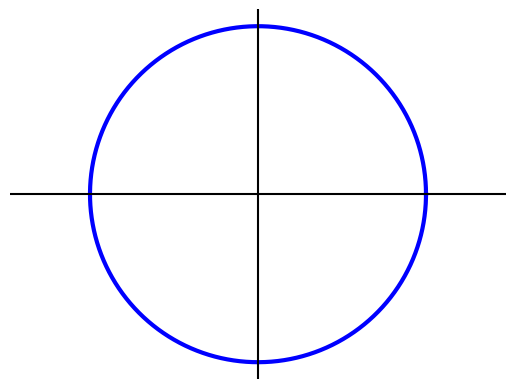

In [10]:
# <!-- collapse=True -->
def plot_shifted_circle_overlap(x0,y0):
    plt.axis('off')
    plt.axis('equal')
    
    # unit circle
    theta = np.linspace(0,2*np.pi,1000)
    xs, ys = np.cos(theta), np.sin(theta)
    plt.plot(xs, ys, lw=3, color="blue")

    # grid lines; origins
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
    plt.plot(0, 0, 'o', color='steelblue',
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.text(-.25,-.125,r"$(0,0)$",
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.plot(x0, y0, 'o', color='black',
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.text(x0+.05,y0-.125,r"$(x_0,y_0)$",
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    
    # shifted circle
    plt.plot(xs + x0, ys + y0, lw=2, color='black', linestyle='dotted', zorder=5)
    dists, dists2 = [], []

    # draw in semicircles to prevent connecting across circle
    for (start,end) in [(np.pi, 2*np.pi), (0, np.pi)]:
        theta = np.linspace(start, end, 1000)
        xs, ys = np.cos(theta), np.sin(theta)
        points_within = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) <= 1])
        points_outside = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) > 1])
        plt.plot(points_within[:, 0], points_within[:, 1], lw=3, c='red')
        plt.plot(points_outside[:, 0], points_outside[:, 1], lw=3, c='green')
        dists += [np.linalg.norm([x0-p[0],y0-p[1]]) for p in points_within]
        # dists2 += [np.linalg.norm([x0-p[0],y0-p[1]]) for p in -points_within]
        dists2 += [np.linalg.norm([x-x0,y-y0]) for (x,y) in points_outside]

    print("Avg dist to reds", np.mean(dists))
    print("Avg dist to all other", np.mean(dists2))
    print("Avg difference:", np.mean(dists + dists2))
    print(r_int(x0,y0))
    plt.show()

plot_shifted_circle_overlap(.5, .0)
# <end collapse>

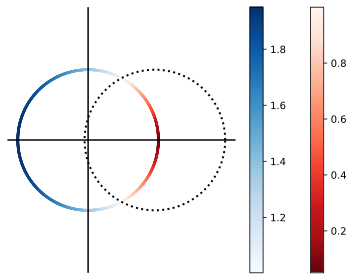

In [477]:
# <!-- collapse=True -->
def plot_shifted_circle_overlap(x0,y0):
    plt.axis('off')
    plt.axis('equal')
    
    # unit circle
    theta = np.linspace(0,2*np.pi,1000)
    xs, ys = np.cos(theta), np.sin(theta)

    # grid lines; origins
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
    # plt.plot(0, 0, 'o', color='steelblue',
    #         path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    # plt.text(-.25,-.125,r"$(0,0)$",
    #         path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    # plt.plot(x0, y0, 'o', color='black',
    #         path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    # plt.text(x0+.05,y0-.125,r"$(x_0,y_0)$",
    #         path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    
    # # shifted circle
    plt.plot(xs + x0, ys + y0, lw=2, color='black', linestyle='dotted', zorder=5)

    # draw in semicircles to prevent connecting across circle
    for (start,end) in [(np.pi, 2*np.pi), (0, np.pi)]:
        theta = np.linspace(start, end, 1000)
        xs, ys = np.cos(theta), np.sin(theta)
        points_within = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) <= 1])
        points_outside = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) > 1])
        plt.scatter(points_within[:, 0], points_within[:, 1], s=3, c=np.sqrt((points_within[:, 0]-x0)**2+(points_within[:, 1]-y0)**2), cmap='Reds_r')
        if start == np.pi: plt.colorbar()
        plt.scatter(points_outside[:,0], points_outside[:,1], s=3, c=np.sqrt((points_outside[:,0]-x0)**2+(points_outside[:,1]-y0)**2), cmap='Blues')
        if start == np.pi: plt.colorbar()
        
    plt.show()

plot_shifted_circle_overlap(.95, .0)
# <end collapse>

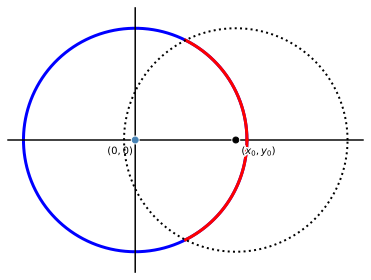

In [462]:
# <!-- collapse=True -->
def plot_shifted_circle_overlap(x0,y0):
    plt.axis('off')
    plt.axis('equal')
    
    # unit circle
    theta = np.linspace(0,2*np.pi,1000)
    xs, ys = np.cos(theta), np.sin(theta)
    plt.plot(xs, ys, lw=3, color="blue")

    # grid lines; origins
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
    plt.plot(0, 0, 'o', color='steelblue',
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.text(-.25,-.125,r"$(0,0)$",
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.plot(x0, y0, 'o', color='black',
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    plt.text(x0+.05,y0-.125,r"$(x_0,y_0)$",
            path_effects=[pe.withStroke(linewidth=3, foreground='w')])
    
    # shifted circle
    plt.plot(xs + x0, ys + y0, lw=2, color='black', linestyle='dotted', zorder=5)

    # draw in semicircles to prevent connecting across circle
    for (start,end) in [(np.pi, 2*np.pi), (0, np.pi)]:
        theta = np.linspace(start, end, 1000)
        xs, ys = np.cos(theta), np.sin(theta)
        points_within = np.array([[x,y] for (x,y) in zip(xs,ys) if np.linalg.norm([x0-x,y0-y]) <= 1])
        plt.plot(points_within[:, 0], points_within[:, 1], lw=3, c='red')
        # plt.scatter(points_2[:, 0], points_2[:, 1], lw=3, c='green', s=1, zorder=10)
    # for t in np.linspace(0, np.pi, 1000):
    #     if np.sqrt(4-4*((y0-x0*np.tan(t))**2)*np.cos(t)**2) <= 1:
    #         (a1,b1), (a2,b2) = diameter_intercepts(x0,y0,t)
    #         plt.plot([a1,a2],[b1,b2], c='black')
        
    plt.show()

plot_shifted_circle_overlap(.9, .0)
# <end collapse>